**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


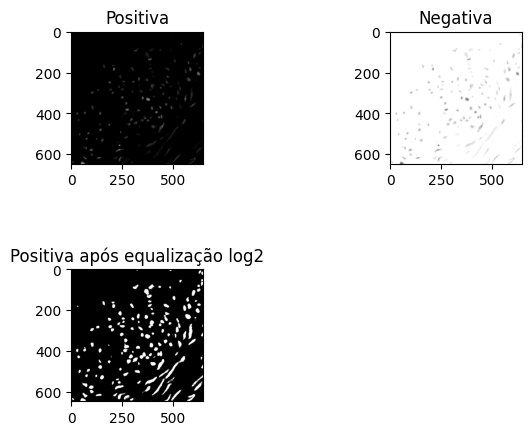

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)

linhas = img.shape[0]
colunas = img.shape[1]

img2 = (255 - img)
img3 = (255 - img2)

x = (float)(0)

i = (int)(0)
while(i < linhas):
    j = (int)(0)
    while(j < colunas):
        x = round((31.875 * math.log2(img[i,j] / 255.0 + 1)) * 255);
        x = min(x, 255)
        img4[i,j] = x
        j = j + 1
    i = i + 1

plt.subplot(2,2,1)
plt.subplots_adjust(wspace=0.8)
plt.title('Positiva')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.subplots_adjust(wspace=0.8)
plt.title('Negativa')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
plt.subplots_adjust(wspace=0.8, hspace = 0.8)
plt.title('Positiva após equalização log2')
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



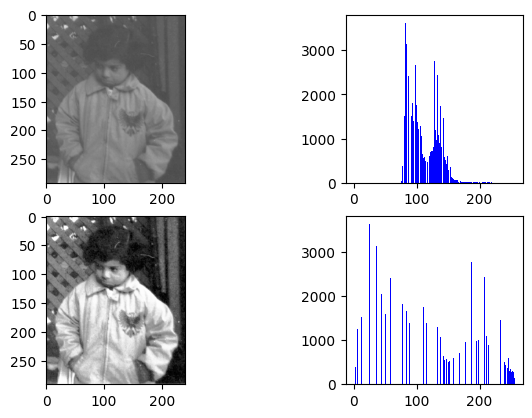

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

img = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("pout.tif", cv2.IMREAD_GRAYSCALE)

plt.subplot(2,2,1)
plt.subplots_adjust(wspace=0.8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.hist(img.ravel(),256,[0,256], color = 'blue'); 

img2 = cv2.equalizeHist(img)
plt.subplot(2,2,3)
plt.subplots_adjust(wspace=0.8)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.subplot(2,2,4)
plt.hist(img2.ravel(),256,[0,256], color = 'blue'); 


3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

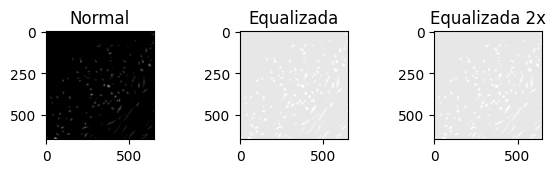

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

def equalizar(img, img2):
    
    linhas = img.shape[0]
    colunas = img.shape[1]
    
    tam = linhas * colunas

    freq = np.zeros(256)
    prob = np.zeros(256)
    accu = np.zeros(256)
    novo = np.zeros(256)

    i = (int)(0)
    while(i < linhas):
        j = (int)(0)
        while(j < colunas):
            x = (int)(img[i,j])
            freq[x] += 1
            j = j + 1
        i = i + 1

    prob = freq / (float)(tam)

    accu[0] = prob[0]

    i = (int)(1)

    while(i < 256):
        accu[i] = accu[i - 1] + prob[i]
        i = i + 1

    novo = 255 * accu

    i = (int)(0)
    while(i < linhas):
        j = (int)(0)
        while(j < colunas):
            x = (int)(img[i,j])
            img2[i,j] = round(novo[x])
            j = j + 1
        i = i + 1
    
img = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("im_cells.png", cv2.IMREAD_GRAYSCALE)

equalizar(img, img2)
equalizar(img2, img3)

plt.subplot(1,3,1)
plt.subplots_adjust(wspace=0.8)
plt.title('Normal')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
plt.subplots_adjust(wspace=0.8)
plt.title('Equalizada')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,3)
plt.subplots_adjust(wspace=0.8)
plt.title('Equalizada 2x')
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)


